# 2-11. 프로젝트 (1) load_digits : 손글씨를 분류해 봅시다

### [루브릭 평가 기준]    

1. 3가지 데이터셋의 구성이 합리적으로 진행되었는가?  -  feature와 label 선정을 위한 데이터 분석과정이 체계적으로 전개됨   
2. 3가지 데이터셋에 대해 각각 5가지 모델을 성공적으로 적용하였는가? - 모델학습 및 테스트가 정상적으로 수행되었음   
3. 3가지 데이터셋에 대해 모델의 평가지표가 적절히 선택되었는가?- 평가지표 선택 및 이유 설명이 타당함   


### [학습 과정]
1. 필요한 모듈 import 하기  
2. 데이터 준비  
3. 데이터 이해하기   
    - feature, label 선정을 위한 데이터 분석 과정
4. train, test 데이터 분리  
5. 다양한 모델로 학습시키기  
    - Decision Tree
    - Random Forest
    - SVM 
    - SGD Classifier 
    - Logistic Regression
6. 각각의 모델 평가하기  

### [모델 평가]
1. 

### (1) 필요한 모듈 import하기
---

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier, LogisticRegression

### (2) 데이터 준비
---
load_digits 메서드를 사용합니다

In [3]:
digits = load_digits()

print(dir(digits)) # digits가 가지고 있는 변수와 메소드 확인
print(type(dir(digits)))  #타입은 무엇인가

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
<class 'list'>


In [4]:
digits.keys() #digits라는 데이터가 가지고 있는 정보들

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

-> 데이터와 라벨이 어떤 이름으로 들어있는지 확인하려면 중요함

### (3) 데이터 이해하기
---
지피지기면 백전불태! 다루어야 할 데이터를 자세히 살펴봅시다.

* Feature Data 지정하기
* Label Data 지정하기
* Target Names 출력해 보기
* 데이터 Describe 해 보기

In [5]:
# feature data 지정해주기

digits_data = digits.data #데이터가 들어있는 리스트를 digits_data로 설정해줌
print(digits_data.shape)
# 1797개의 데이터, 64개의 특성으로 이루어짐

(1797, 64)


In [6]:
# Label Data 지정하기

digits_label = digits.target #target이 들어있는 리스트를 label(정답)로 설정
print(digits_label.shape)
digits_label
# 1797개의 라벨들, 0부터 9까지의 값으로 나타납니다.

(1797,)


array([0, 1, 2, ..., 8, 9, 8])

In [7]:
# Target Names 출력해보기

digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
#feature data 파헤치기, 데이터 describe 해보기
digits_data[0] #-> 이미지 데이터임을 알 수 있습니다.

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

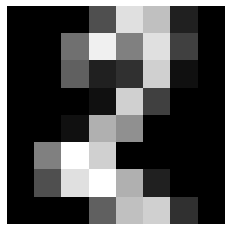

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.data[50].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

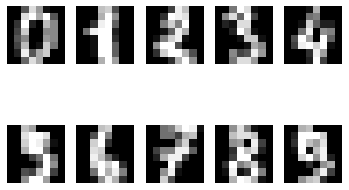

In [10]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

digits 데이터셋은 총 1797개의 이미지 데이터를 가지고 있고 0부터 9까지의 숫자로 나타납니다. 

### (4) train, test 데이터 분리
---
모델 학습과 테스트용 문제지와 정답지를 준비해 봅시다.
X_train, X_test, y_train, y_test를 생성하는 방법을 참고해 보세요.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                   digits_label,
                                                   test_size=0.2,
                                                   random_state=7)

In [12]:
print("X_train :", len(X_train), "X_test :", len(X_test))
# 4대 1의 비율로 분할됨

X_train : 1437 X_test : 360


In [13]:
# 최적의 비율을 찾을 수는 없을까? -비율 계속 바꿔보기
# random state를 바꾼다면? 숫자가 높을수록 정확하게 예측할까? - 숫자 바꿔보기

In [14]:
X_train.shape, y_train.shape # train 데이터, 라벨 행렬 모양 확인

((1437, 64), (1437,))

In [15]:
X_test.shape, y_test.shape # test 데이터, 라벨 행렬 모양 확인

((360, 64), (360,))

### (5) 다양한 모델로 학습시켜보기
---
학습데이터 X_train, y_train 을 활용해 분류기 모델을 만들어 봅시다. 어떤 모델이 가장 좋은 성능을 보일까요?

* Decision Tree 사용해 보기
* Random Forest 사용해 보기
* SVM 사용해 보기
* SGD Classifier 사용해 보기
* Logistic Regression 사용해 보기

__1. Decision Tree 사용해보기__

In [16]:
decision_tree = DecisionTreeClassifier(random_state=32) #의사결정나무 모델 생성
decision_tree.fit(X_train, y_train) #모델 학습
y_pred01 = decision_tree.predict(X_test) #예측값

print(classification_report(y_test, y_pred01)) # 정답과 맞는가

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



In [17]:
# 인사이트?
# 0의 정밀도가 100프로라니 
# 높은 정밀도 순으로 나열해볼까?

__2. Random Forest 사용해보기__

In [18]:
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred02 = random_forest.predict(X_test)

print(classification_report(y_test, y_pred02))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.93      1.00      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.84      0.91        43
           9       0.94      0.94      0.94        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360



__3. SVM 사용해보기__

In [19]:
svm_model = svm.SVC(random_state=32)

svm_model.fit(X_train, y_train)
y_pred03 = svm_model.predict(X_test)

print(classification_report(y_test, y_pred03))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



__4. SGD Classifier 사용해보기__

In [20]:
sgd_model = SGDClassifier(random_state=32)

sgd_model.fit(X_train, y_train)
y_pred04 = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred04))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.85      0.95      0.90        42
           2       0.98      1.00      0.99        40
           3       0.89      0.94      0.91        34
           4       1.00      0.97      0.99        37
           5       0.93      1.00      0.97        28
           6       0.96      0.93      0.95        28
           7       0.97      0.97      0.97        33
           8       0.88      0.88      0.88        43
           9       0.96      0.72      0.82        32

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



In [21]:
# 랜덤숫자를 모델마다 다 똑같이 주고 비교하는게 맞는거겠지?

__5. Logistic Regression 사용해보기__

In [22]:
logistic_model = LogisticRegression(random_state=32)

logistic_model.fit(X_train, y_train)
y_pred05 = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred05))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        42
           2       0.98      1.00      0.99        40
           3       0.94      0.97      0.96        34
           4       0.97      1.00      0.99        37
           5       0.82      0.96      0.89        28
           6       1.00      0.96      0.98        28
           7       0.97      0.97      0.97        33
           8       0.92      0.81      0.86        43
           9       0.97      0.91      0.94        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



/home/ssac18/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [23]:
# warning 메세지 해결해주기
# max_iter 조정

### (6) 모델을 평가해 보기
---
학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까요? 모델의 성능을 평가하는 지표로는 무엇이 좋을까요? sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해 보세요. 선택하신 이유도 설명해 주세요.

In [24]:
# SGD Classifier의 경우, 결정함수 사용
# 분류기에서 predict 대신 decision_function 사용

